In [1]:
from sklearn.datasets import load_digits 
from sklearn.cluster import KMeans
import matplotlib.pylab as plt 
digits = load_digits() 

kmeans = KMeans(n_clusters=10, random_state=10)
cluster = kmeans.fit_predict(digits.data)
#print(kmeans.cluster_centers_.shape)

fig, ax = plt.subplots(2, 5, figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.show()

<Figure size 800x300 with 10 Axes>

In [2]:
# accuracy 
from scipy.stats import mode 
from sklearn.metrics import accuracy_score
import numpy as np 

print(digits.target.shape)
 
labels = np.zeros_like(cluster)
for i in range(10):
    mask = (cluster == i)
    labels[mask] = mode(digits.target[mask])[0]  #most common value

print(accuracy_score(digits.target, labels)) 

(1797,)
0.7946577629382304


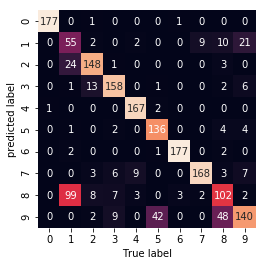

In [3]:
# confusion matrix (correlation)
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True
            , fmt='d' , cbar=False
            , xticklabels=digits.target_names
            , yticklabels=digits.target_names)
   
plt.xlabel('True label')
plt.ylabel('predicted label')
plt.show()